<a href="https://colab.research.google.com/github/PALLITULASIRAM/task-6/blob/main/task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

📊 Target Classes: ['setosa' 'versicolor' 'virginica']

✅ D

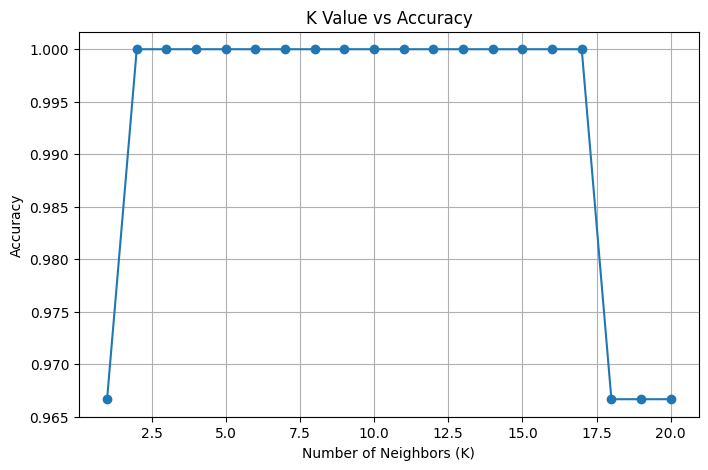

🌟 Best K value: 2 with Accuracy = 1.0000


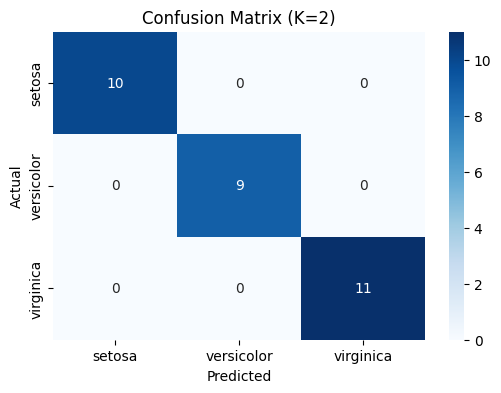

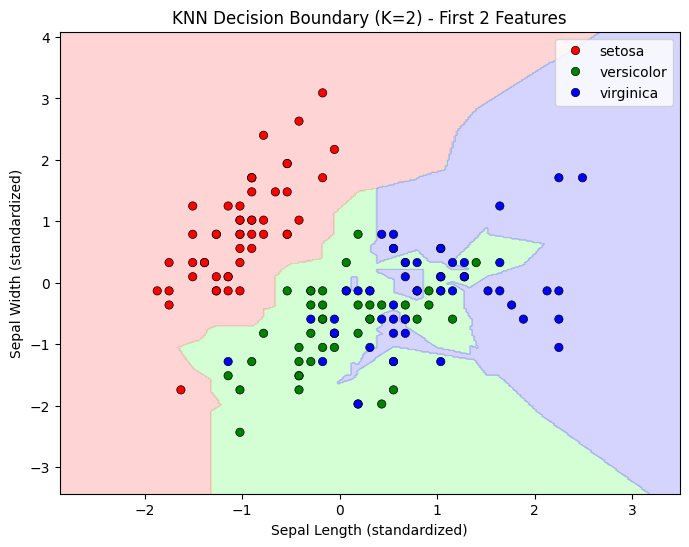


✅ Conclusion:
- KNN Classifier achieved best accuracy with K = 2.
- Normalization improved model performance.
- Decision boundaries clearly separate the 3 Iris species.



In [1]:
# ============================================
# 🌸 Task 6: K-Nearest Neighbors (KNN)
# Dataset: Iris
# Tools: Scikit-learn, Pandas, Matplotlib
# ============================================

# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

print("✅ Dataset Loaded Successfully!")
print(X.head())

# Step 3: Data Overview
print("\n🔍 Dataset Info:")
print(X.info())
print("\n📊 Target Classes:", iris.target_names)

# Step 4: Normalize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Data Normalized Successfully!")

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("✅ Data Split into Training and Testing Sets")

# Step 6: Train KNN Classifier with Default K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predictions & Evaluation
y_pred = knn.predict(X_test)
print("\n📈 Model Evaluation (K=5):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 8: Experiment with Different K Values
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracy_scores)]
print(f"🌟 Best K value: {best_k} with Accuracy = {max(accuracy_scores):.4f}")

# Step 9: Final Model with Best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Step 10: Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f"Confusion Matrix (K={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Visualize Decision Boundaries (using first 2 features)
from matplotlib.colors import ListedColormap

X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=iris.target_names[y],
                palette=cmap_bold, edgecolor='k')
plt.title(f"KNN Decision Boundary (K={best_k}) - First 2 Features")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.show()

# Step 12: Conclusion
print(f"""
✅ Conclusion:
- KNN Classifier achieved best accuracy with K = {best_k}.
- Normalization improved model performance.
- Decision boundaries clearly separate the 3 Iris species.
""")
